In [43]:
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.core.fromnumeric import shape
kernal=np.ones((2,2))

In [44]:
# pic='sample (3).jpg'
pic='sample222.jpg'
plt.rcParams['figure.figsize']=(10,10)

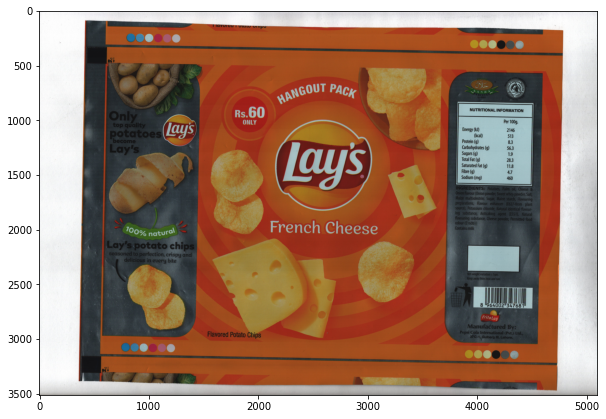

In [45]:
img=cv2.imread(pic)
img=imutils.rotate_bound(img,-90)
picture=img.copy()
# img=img[80:420:,190:380]
plt.imshow(img[:,:,::-1])

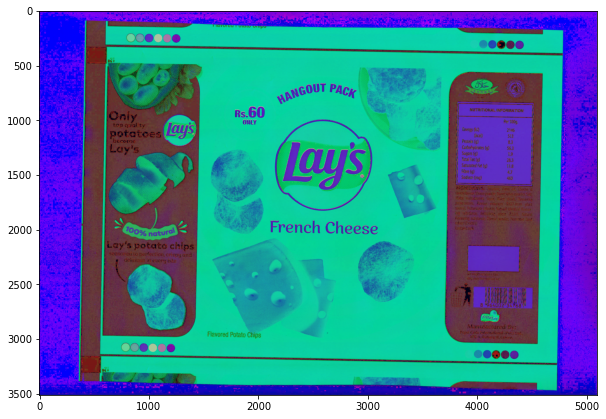

In [46]:
hsv=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
plt.imshow(hsv)

In [47]:
# a=[]
# # widgets.interact(mask,h=h,s=s,v=v)
# def mask(h=(0,255),s=(0,255),v=(0,200)):
#     img=cv2.imread(pic)
#     global mask_image
#     global a
#     mask_image=cv2.inRange(hsv,np.array((h[0],s[0],v[0])),np.array((h[1],s[1],v[1])))
#     plt.imshow(mask_image,cmap='gray')
# #     plt.imshow(cv2.cvtColor(mask_image,cv2.COLOR_BGR2RGB))
#     contour,hierarchy=cv2.findContours(mask_image,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)
#     contour=sorted(contour,key=lambda x:cv2.contourArea(x),reverse=True)
# #     cv2.drawContours(img, cnt, -1, (0, 255, 0), 10)
#     print(len(contour))
# #     a=[]
# # print(len(contour))
#     for cnt in contour[:2]:
# #     print(len(cnt))
# #     print(cv2.boundingRect(contour[0]))
# #     (x,y,w,h)=cv2.boundingRect(cnt)
# #     cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
#         area=cv2.contourArea(cnt)
#         if area>350:
# #         if (area>Area[0]) & (area<Area[1]):
# #         print(area)
#             a.append(cnt)
#             cv2.drawContours(img, cnt, -1, (0, 255, 0), 10)
#     plt.imshow(img[:,:,::-1])
# #     return mask_image
# #     cv2.imwrite('mask.png',cv2.cvtColor(mask_image,cv2.COLOR_BGR2RGB))


In [48]:
shape(hsv)[1]

5100

17
18
19
20
21
22
23
24
22598.0
1
25
23641.5
1
23506.5
2


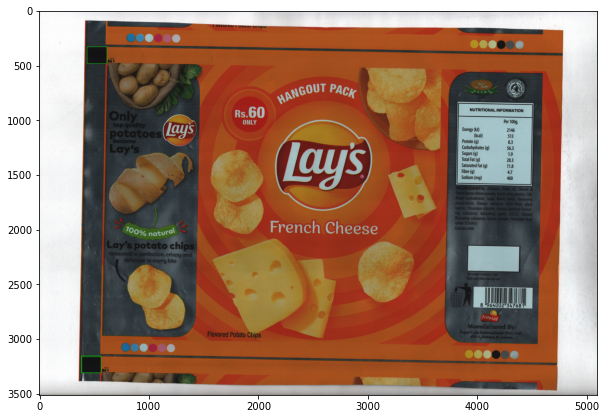

In [49]:
b=10
for i in range (17,35):
    mask_image=cv2.inRange(hsv[:,:int(shape(hsv)[1]/3)],np.array((0,0,0)),np.array((180,255,i)))
    plt.imshow(mask_image,cmap='gray')
    contour,hierarchy=cv2.findContours(mask_image,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)
    contour=sorted(contour,key=lambda x:cv2.contourArea(x),reverse=True)
    print(i)
    a=[]
    for cnt in contour:
        area=cv2.contourArea(cnt)
        if (area>22000) & (area<26000):
            print(area)
            a.append(cnt)
#             cv2.drawContours(img, cnt, -1, (0, 255, 0), 10)
            (x,y,w,h)=cv2.boundingRect(cnt)
            cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
            print(len(a))
            if len(a)==2:
                b=1
                break
    if b==1:
        break
plt.imshow(img[:,:,::-1])

23641.5 23506.5


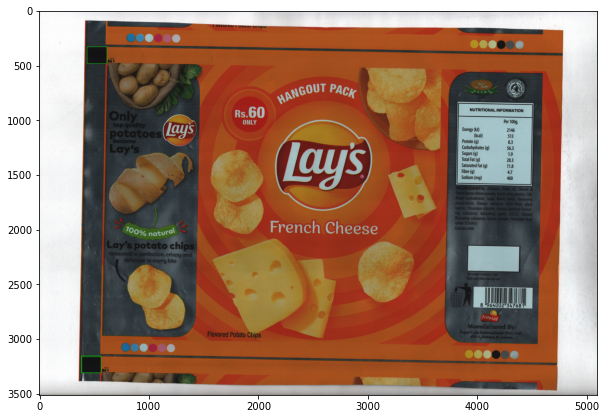

In [50]:
x,y,w,h = cv2.boundingRect(a[0])
cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
# plt.imshow(img1[:,:,::-1])
x1,y1,w1,h1 = cv2.boundingRect(a[1])
cv2.rectangle(img,(x1,y1),(x1+w1,y1+h1),(0,255,0),2)
plt.imshow(img[:,:,::-1])
print(cv2.contourArea(a[0]),cv2.contourArea(a[1]))

In [51]:
height=int(x)-int(x1)
base=int(y)-int(y1)
# print(height,base)
from math import atan,degrees
# try:
# theta=atan(base/height)
theta=atan(height/base)
theta= degrees(theta)
# except:
#     theta=0
theta

-1.0161364376039945

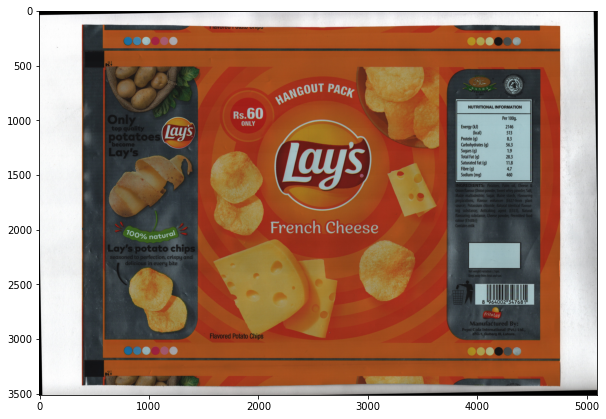

In [52]:
img=picture.copy()
rot=imutils.rotate(img,angle=-theta)
plt.imshow(rot[:,:,::-1])

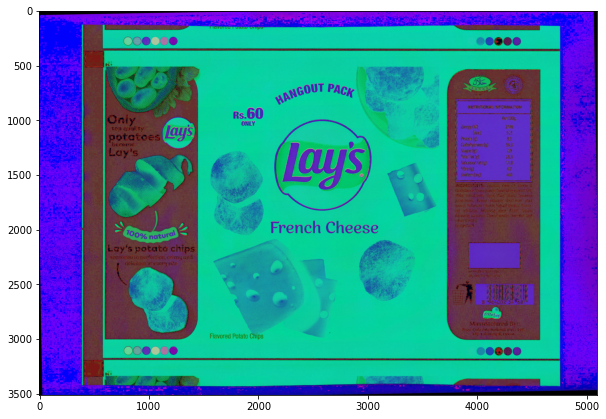

In [53]:
hsv=cv2.cvtColor(rot,cv2.COLOR_BGR2HSV)
plt.imshow(hsv)

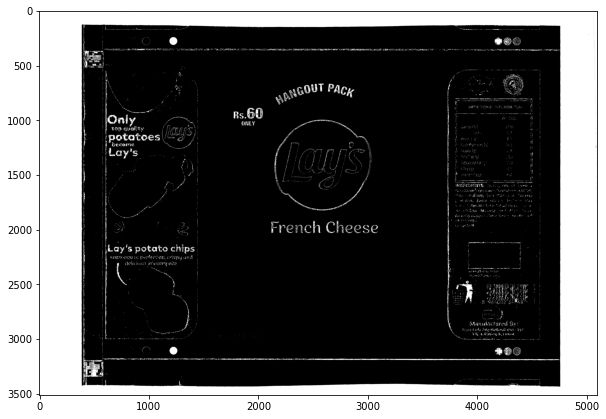

In [54]:
# mask_image=cv2.inRange(hsv,np.array((125,100,30)),np.array((255,255,255)))
mask_image=cv2.inRange(hsv,np.array((0,0,0)),np.array((255,25,255)))

plt.imshow(mask_image,cmap='gray')

In [55]:
contour,hierarchy=cv2.findContours(mask_image,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)
contour=sorted(contour,key=lambda x:cv2.contourArea(x),reverse=True)

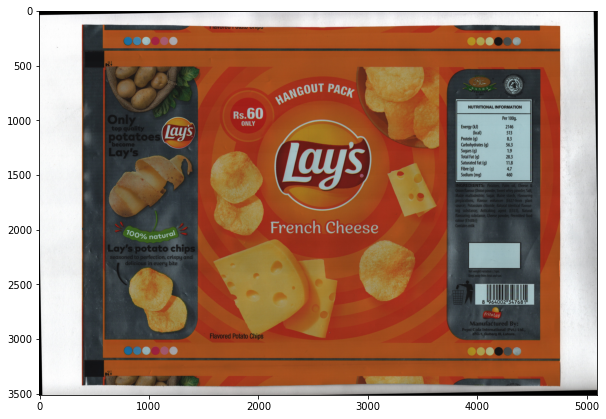

In [56]:
# img1=rot.copy()
img=picture.copy()
img1=imutils.rotate(img,angle=-theta)
plt.imshow(img1[:,:,::-1])

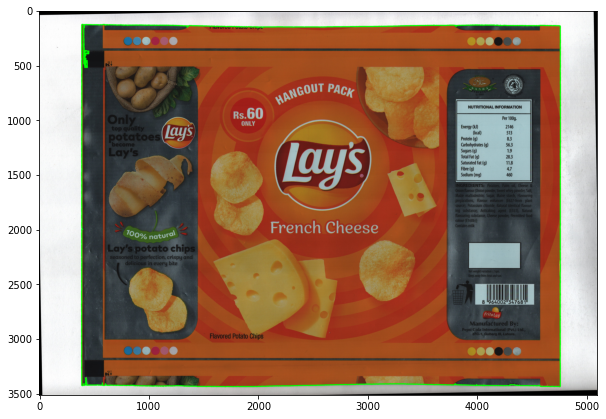

In [57]:
a=[]
# print(len(contour))
for cnt in contour[1:2]:
#     print(len(cnt))
#     print(cv2.boundingRect(contour[0]))
#     (x,y,w,h)=cv2.boundingRect(cnt)
#     cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    area=cv2.contourArea(cnt)
#     if area>30000:
    if area>4:
#         print(area)
        a.append(cnt)
        cv2.drawContours(rot, cnt, -1, (0, 255, 0), 10)
plt.imshow(rot[:,:,::-1])

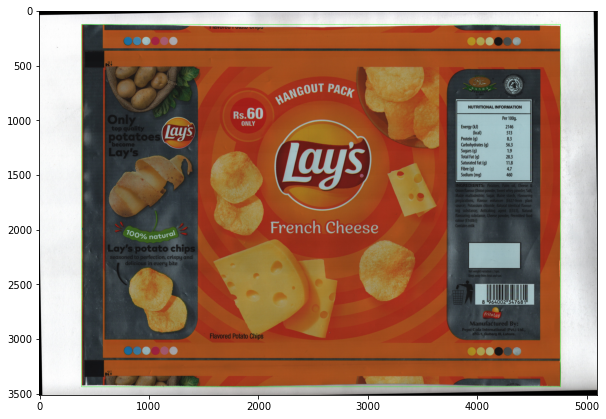

In [58]:
x,y,w,h = cv2.boundingRect(a[0])
cv2.rectangle(img1,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(img1[:,:,::-1])

In [59]:
img1=img1[y:y+h,x:x+w].copy()
picture=img1.copy()

In [60]:
# img1=picture.copy()

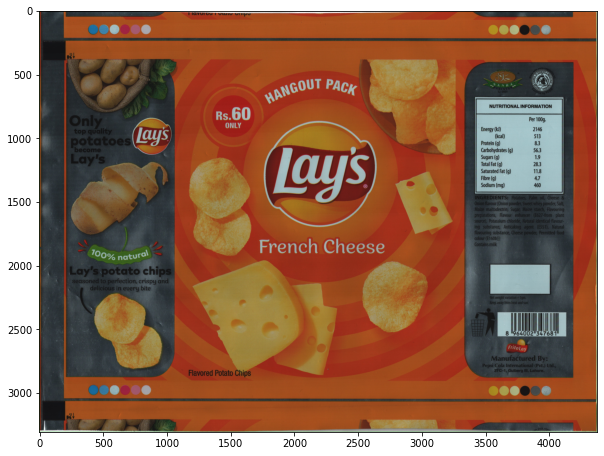

In [61]:
plt.imshow(img1[:,:,::-1])

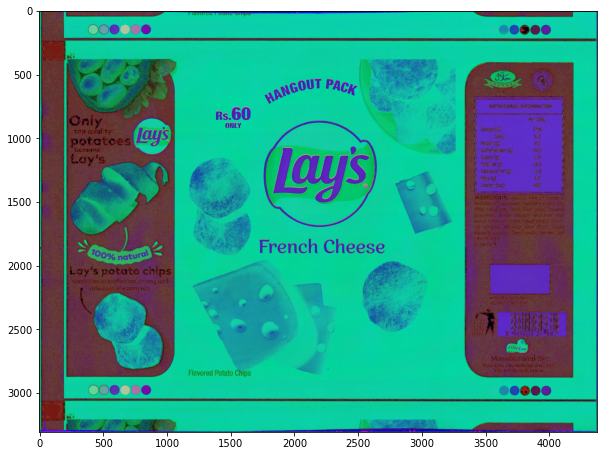

In [62]:
hsv=cv2.cvtColor(img1,cv2.COLOR_BGR2HSV)
plt.imshow(hsv)

17
18
19
20
21
22
23
24
22365.5
1
25
23545.0
1
23518.0
2


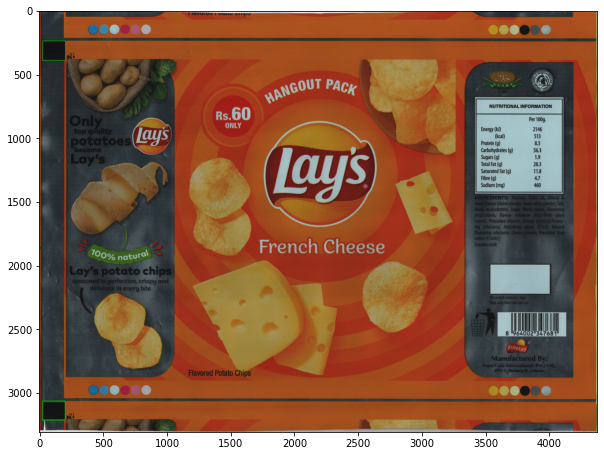

In [63]:
b=10
for i in range (17,35):
    mask_image=cv2.inRange(hsv[:,:int(shape(hsv)[1]/3)],np.array((0,0,0)),np.array((180,255,i)))
    plt.imshow(mask_image,cmap='gray')
    contour,hierarchy=cv2.findContours(mask_image,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)
    contour=sorted(contour,key=lambda x:cv2.contourArea(x),reverse=True)
    print(i)
    a=[]
    for cnt in contour:
        area=cv2.contourArea(cnt)
        if (area>22000) & (area<26000):
            print(area)
            a.append(cnt)
#             cv2.drawContours(img, cnt, -1, (0, 255, 0), 10)
            (x,y,w,h)=cv2.boundingRect(cnt)
            cv2.rectangle(img1,(x,y),(x+w,y+h),(0,255,0),2)
            print(len(a))
            if len(a)==2:
                b=1
                break
    if b==1:
        break
plt.imshow(img1[:,:,::-1])

241 3060


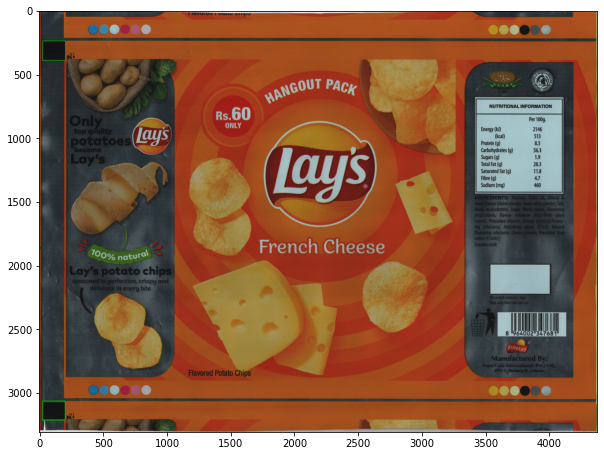

In [64]:
# img1=cv2.imread(pic)
x,y,w,h = cv2.boundingRect(a[0])
cv2.rectangle(img1,(x,y),(x+w,y+h),(0,255,0),2)
# plt.imshow(img1[:,:,::-1])
x1,y1,w1,h1 = cv2.boundingRect(a[1])
cv2.rectangle(img1,(x1,y1),(x1+w1,y1+h1),(0,255,0),2)
plt.imshow(img1[:,:,::-1])
print(y,y1)

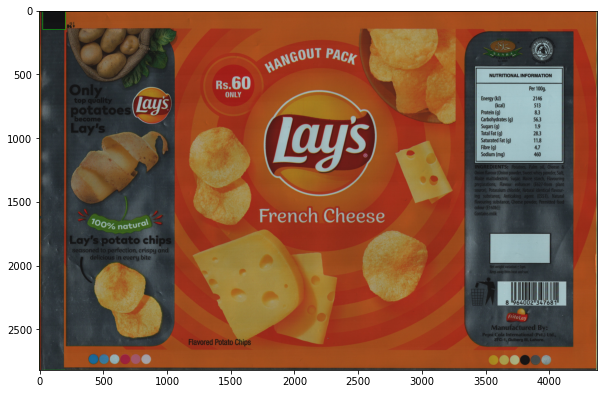

In [65]:
try:
    plt.imshow(img1[y:y1,:][:,:,::-1])
except:
    plt.imshow(img1[y1:y,:][:,:,::-1])

In [66]:
# cv2.imwrite('test.jpg',img1[y1:y2,:])
try:
    cv2.imwrite('sample222_11.jpg',img1[y:y1,:])
except:
    cv2.imwrite('sample222_11.jpg',img1[y1:y,:])

In [169]:
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.core.fromnumeric import shape

def differnece(img):
    img=imutils.rotate_bound(img,-90)
    picture=img.copy()
    hsv=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
    
    
    b=10
    for i in range (17,35):
        mask_image=cv2.inRange(hsv[:,:int(shape(hsv)[1]/3)],np.array((0,0,0)),np.array((180,255,i)))
        plt.imshow(mask_image,cmap='gray')
        contour,hierarchy=cv2.findContours(mask_image,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)
        contour=sorted(contour,key=lambda x:cv2.contourArea(x),reverse=True)
#         print(i)
        a=[]
        for cnt in contour:
            area=cv2.contourArea(cnt)
            if (area>22000) & (area<26000):
#                 print(area)
                a.append(cnt)
    #             cv2.drawContours(img, cnt, -1, (0, 255, 0), 10)
                (x,y,w,h)=cv2.boundingRect(cnt)
                cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
#                 print(len(a))
                if len(a)==2:
                    b=1
                    break
        if b==1:
            break
            
    x,y,w,h = cv2.boundingRect(a[0])
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    # plt.imshow(img1[:,:,::-1])
    x1,y1,w1,h1 = cv2.boundingRect(a[1])
    cv2.rectangle(img,(x1,y1),(x1+w1,y1+h1),(0,255,0),2)
#     plt.imshow(img[:,:,::-1])
#     print(cv2.contourArea(a[0]),cv2.contourArea(a[1]))
    
    height=int(x)-int(x1)
    base=int(y)-int(y1)
    # print(height,base)
    from math import atan,degrees
    # try:
    # theta=atan(base/height)
    theta=atan(height/base)
    theta= degrees(theta)
    # except:
    #     theta=0
    theta
    img=picture.copy()
    rot=imutils.rotate(img,angle=-theta)
    plt.imshow(rot[:,:,::-1])

    hsv=cv2.cvtColor(rot,cv2.COLOR_BGR2HSV)
    
    mask_image=cv2.inRange(hsv,np.array((125,100,30)),np.array((255,255,255)))

    contour,hierarchy=cv2.findContours(mask_image,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)
    contour=sorted(contour,key=lambda x:cv2.contourArea(x),reverse=True)
    
    img=picture.copy()
    img1=imutils.rotate(img,angle=-theta)

    
    a=[]
# print(len(contour))
    for cnt in contour[1:2]:
    #     print(len(cnt))
    #     print(cv2.boundingRect(contour[0]))
    #     (x,y,w,h)=cv2.boundingRect(cnt)
    #     cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
        area=cv2.contourArea(cnt)
    #     if area>30000:
        if area>4:
    #         print(area)
            a.append(cnt)
            cv2.drawContours(rot, cnt, -1, (0, 255, 0), 10)
    plt.imshow(rot[:,:,::-1])
    
    x,y,w,h = cv2.boundingRect(a[0])
    cv2.rectangle(img1,(x,y),(x+w,y+h),(0,255,0),2)
    plt.imshow(img1[:,:,::-1])
    
    img1=img1[y:y+h,x:x+w].copy()
    picture=img1.copy()
    
    hsv=cv2.cvtColor(img1,cv2.COLOR_BGR2HSV)
#     plt.imshow(hsv)
    
    b=10
    for i in range (17,35):
        mask_image=cv2.inRange(hsv[:,:int(shape(hsv)[1]/3)],np.array((0,0,0)),np.array((180,255,i)))
        plt.imshow(mask_image,cmap='gray')
        contour,hierarchy=cv2.findContours(mask_image,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)
        contour=sorted(contour,key=lambda x:cv2.contourArea(x),reverse=True)
#         print(i)
        a=[]
        for cnt in contour:
            area=cv2.contourArea(cnt)
            if (area>22000) & (area<26000):
#                 print(area)
                a.append(cnt)
    #             cv2.drawContours(img, cnt, -1, (0, 255, 0), 10)
                (x,y,w,h)=cv2.boundingRect(cnt)
                cv2.rectangle(img1,(x,y),(x+w,y+h),(0,255,0),2)
                print(len(a))
                if len(a)==2:
                    b=1
#                     return img1
                    break
        if b==1:
            break
#     plt.imshow(img1[:,:,::-1])
    x,y,w,h = cv2.boundingRect(a[0])
    cv2.rectangle(picture,(x,y),(x+w,y+h),(0,255,0),2)
    # plt.imshow(img1[:,:,::-1])
    x1,y1,w1,h1 = cv2.boundingRect(a[1])
    cv2.rectangle(picture,(x1,y1),(x1+w1,y1+h1),(0,255,0),2)
    plt.imshow(picture[:,:,::-1])
    print(y,y1)
#     print('asdas')
    print(picture)
    try:
        return picture[y:y1,:]
    except:
        return picture[y1:y,:]

In [170]:
pic='sample (3).jpg'
img=cv2.imread("sample (3).jpg")

1
2
3179 8
[[[  0 255   0]
  [  0 255   0]
  [  0 255   0]
  ...
  [  0 255   0]
  [  0 255   0]
  [  0 255   0]]

 [[  0 255   0]
  [  0 255   0]
  [  0 255   0]
  ...
  [  0 255   0]
  [  0 255   0]
  [  0 255   0]]

 [[  0 255   0]
  [  0 255   0]
  [132 117 193]
  ...
  [103  80 188]
  [100  76 187]
  [  0 255   0]]

 ...

 [[  0 255   0]
  [  0 255   0]
  [ 78  59 151]
  ...
  [ 94  67 187]
  [ 93  67 186]
  [  0 255   0]]

 [[  0 255   0]
  [  0 255   0]
  [ 77  59 149]
  ...
  [ 92  65 184]
  [ 94  68 186]
  [  0 255   0]]

 [[  0 255   0]
  [  0 255   0]
  [  0 255   0]
  ...
  [  0 255   0]
  [  0 255   0]
  [  0 255   0]]]


array([], shape=(0, 4369, 3), dtype=uint8)

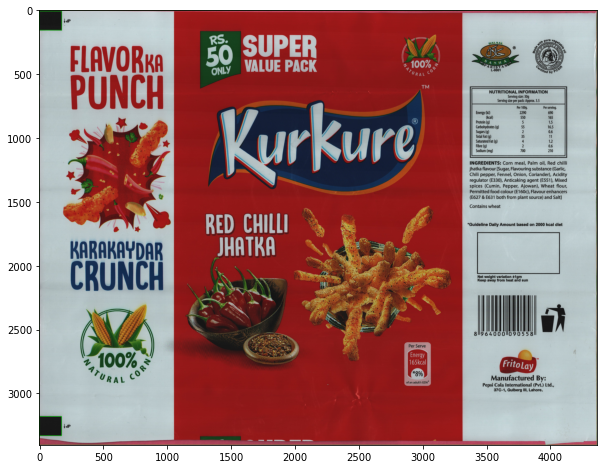

In [171]:
pic='sample (3).jpg'
img=cv2.imread("sample (3).jpg")
img=differnece(img)
img
# plt.imshow(img[:,:,::-1])

ValueError: zero-size array to reduction operation minimum which has no identity

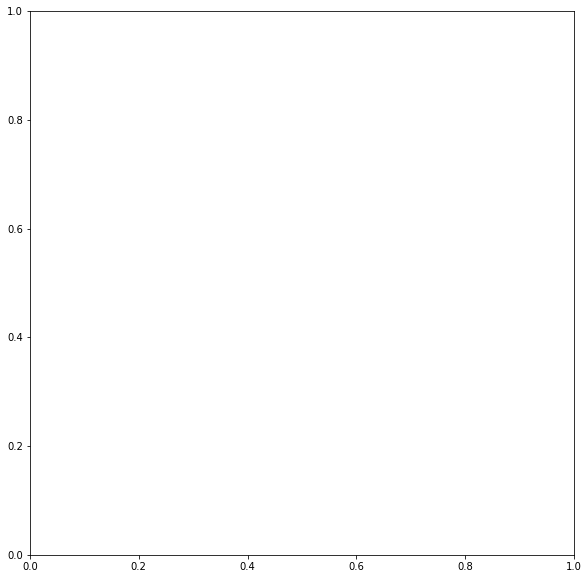

In [172]:
plt.imshow(img[:,:,::-1])

1
2
3179 8


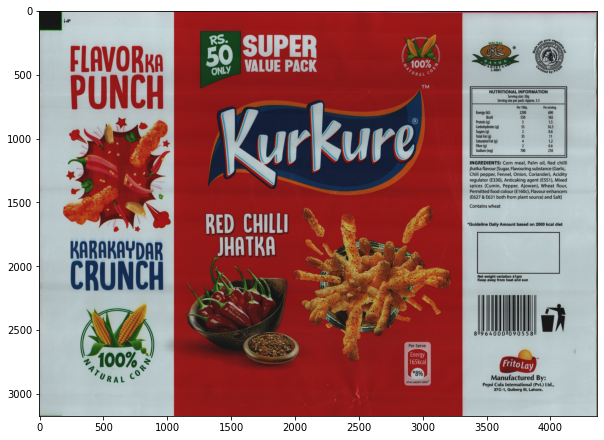

In [173]:
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.core.fromnumeric import shape

def differnece(img):
    global picture
    img=imutils.rotate_bound(img,-90)
    picture=img.copy()
    hsv=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
    global y
    global y1    
    b=10
    for i in range (17,35):
        mask_image=cv2.inRange(hsv[:,:int(shape(hsv)[1]/3)],np.array((0,0,0)),np.array((180,255,i)))
        plt.imshow(mask_image,cmap='gray')
        contour,hierarchy=cv2.findContours(mask_image,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)
        contour=sorted(contour,key=lambda x:cv2.contourArea(x),reverse=True)
#         print(i)
        a=[]
        for cnt in contour:
            area=cv2.contourArea(cnt)
            if (area>22000) & (area<26000):
#                 print(area)
                a.append(cnt)
    #             cv2.drawContours(img, cnt, -1, (0, 255, 0), 10)
                (x,y,w,h)=cv2.boundingRect(cnt)
                cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
#                 print(len(a))
                if len(a)==2:
                    b=1
                    break
        if b==1:
            break
            
    x,y,w,h = cv2.boundingRect(a[0])
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    # plt.imshow(img1[:,:,::-1])
    x1,y1,w1,h1 = cv2.boundingRect(a[1])
    cv2.rectangle(img,(x1,y1),(x1+w1,y1+h1),(0,255,0),2)
#     plt.imshow(img[:,:,::-1])
#     print(cv2.contourArea(a[0]),cv2.contourArea(a[1]))
    
    height=int(x)-int(x1)
    base=int(y)-int(y1)
    # print(height,base)
    from math import atan,degrees
    # try:
    # theta=atan(base/height)
    theta=atan(height/base)
    theta= degrees(theta)
    # except:
    #     theta=0
    theta
    img=picture.copy()
    rot=imutils.rotate(img,angle=-theta)
    plt.imshow(rot[:,:,::-1])

    hsv=cv2.cvtColor(rot,cv2.COLOR_BGR2HSV)
    
    mask_image=cv2.inRange(hsv,np.array((125,100,30)),np.array((255,255,255)))

    contour,hierarchy=cv2.findContours(mask_image,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)
    contour=sorted(contour,key=lambda x:cv2.contourArea(x),reverse=True)
    
    img=picture.copy()
    img1=imutils.rotate(img,angle=-theta)

    
    a=[]
# print(len(contour))
    for cnt in contour[1:2]:
    #     print(len(cnt))
    #     print(cv2.boundingRect(contour[0]))
    #     (x,y,w,h)=cv2.boundingRect(cnt)
    #     cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
        area=cv2.contourArea(cnt)
    #     if area>30000:
        if area>4:
    #         print(area)
            a.append(cnt)
            cv2.drawContours(rot, cnt, -1, (0, 255, 0), 10)
    plt.imshow(rot[:,:,::-1])
    
    x,y,w,h = cv2.boundingRect(a[0])
    cv2.rectangle(img1,(x,y),(x+w,y+h),(0,255,0),2)
    plt.imshow(img1[:,:,::-1])
    
    img1=img1[y:y+h,x:x+w].copy()
    picture=img1.copy()
    
    hsv=cv2.cvtColor(img1,cv2.COLOR_BGR2HSV)
#     plt.imshow(hsv)
    
    b=10
    for i in range (17,35):
        mask_image=cv2.inRange(hsv[:,:int(shape(hsv)[1]/3)],np.array((0,0,0)),np.array((180,255,i)))
        plt.imshow(mask_image,cmap='gray')
        contour,hierarchy=cv2.findContours(mask_image,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)
        contour=sorted(contour,key=lambda x:cv2.contourArea(x),reverse=True)
#         print(i)
        a=[]
        for cnt in contour:
            area=cv2.contourArea(cnt)
            if (area>22000) & (area<26000):
#                 print(area)
                a.append(cnt)
    #             cv2.drawContours(img, cnt, -1, (0, 255, 0), 10)
                (x,y,w,h)=cv2.boundingRect(cnt)
                cv2.rectangle(img1,(x,y),(x+w,y+h),(0,255,0),2)
#                 print(len(a))
                if len(a)==2:
                    b=1
#                     return img1
                    break
        if b==1:
            break
    # cv2.imshow('1',img1)
    x,y,w,h = cv2.boundingRect(a[0])
    cv2.rectangle(img1,(x,y),(x+w,y+h),(0,255,0),2)
    # plt.imshow(img1[:,:,::-1])
    x1,y1,w1,h1 = cv2.boundingRect(a[1])
    cv2.rectangle(img1,(x1,y1),(x1+w1,y1+h1),(0,255,0),2)
    
#     print(y,y1)
#     print('asdas')
    # cv2.imshow('2',img1)
    try:
        picture=img1[y1:y,:]
        return picture
    except:
        picture=img1[y:y1,:]
        return picture



pic='sample (3).jpg'
abc=cv2.imread("sample (3).jpg")
img=differnece(abc)
plt.imshow(img[:,:,::-1])

NameError: name 'plt' is not defined